# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [35]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 2 of Set 1 | hihifo
City not found. Skipping...
Processing Record 3 of Set 1 | weno
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | bikenibeu village
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | sao jose da coroa grande
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | magadi
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | torzhok
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | edinburgh of the seven

Processing Record 36 of Set 4 | villa gesell
Processing Record 37 of Set 4 | constantia
Processing Record 38 of Set 4 | colonia
Processing Record 39 of Set 4 | mount isa
Processing Record 40 of Set 4 | rongelap
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | portage la prairie
Processing Record 43 of Set 4 | dalandzadgad
Processing Record 44 of Set 4 | kupang
Processing Record 45 of Set 4 | palembang
Processing Record 46 of Set 4 | tangshan
Processing Record 47 of Set 4 | arkhangel'sk
Processing Record 48 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 49 of Set 4 | nagqu
Processing Record 0 of Set 5 | ayaguz
City not found. Skipping...
Processing Record 1 of Set 5 | yuzhno-kurilsk
Processing Record 2 of Set 5 | luanda
Processing Record 3 of Set 5 | kone
Processing Record 4 of Set 5 | tazovsky
Processing Record 5 of Set 5 | gannan
Processing Record 6 of Set 5 | taltal
Processing Record 7 of Set 5 | tazacorte
Processing Record 8 of Set 5 | bi

Processing Record 30 of Set 8 | copiapo
Processing Record 31 of Set 8 | metahara
Processing Record 32 of Set 8 | eastham
Processing Record 33 of Set 8 | vohipaho
City not found. Skipping...
Processing Record 34 of Set 8 | mersa matruh
Processing Record 35 of Set 8 | mar del plata
Processing Record 36 of Set 8 | kovur
Processing Record 37 of Set 8 | pursat
Processing Record 38 of Set 8 | ain sefra
Processing Record 39 of Set 8 | mugia
Processing Record 40 of Set 8 | el calafate
Processing Record 41 of Set 8 | rawson
Processing Record 42 of Set 8 | kertih
Processing Record 43 of Set 8 | sidi ifni
Processing Record 44 of Set 8 | mudgee
Processing Record 45 of Set 8 | amahai
Processing Record 46 of Set 8 | nha trang
Processing Record 47 of Set 8 | filadelfia
Processing Record 48 of Set 8 | ra-ngae
Processing Record 49 of Set 8 | mermoz boabab
Processing Record 0 of Set 9 | sonsorol village
City not found. Skipping...
Processing Record 1 of Set 9 | quellon
Processing Record 2 of Set 9 | laz

Processing Record 20 of Set 12 | takum
Processing Record 21 of Set 12 | karratha
Processing Record 22 of Set 12 | chibougamau
Processing Record 23 of Set 12 | soria
Processing Record 24 of Set 12 | bubaque
Processing Record 25 of Set 12 | cidreira
Processing Record 26 of Set 12 | san antonio
Processing Record 27 of Set 12 | fort-shevchenko
Processing Record 28 of Set 12 | kasongo-lunda
Processing Record 29 of Set 12 | erenhot
Processing Record 30 of Set 12 | east london
Processing Record 31 of Set 12 | johvi
Processing Record 32 of Set 12 | crane
Processing Record 33 of Set 12 | rabo de peixe
Processing Record 34 of Set 12 | fort bragg
Processing Record 35 of Set 12 | galveston
Processing Record 36 of Set 12 | kragero
Processing Record 37 of Set 12 | la paz
Processing Record 38 of Set 12 | egra
Processing Record 39 of Set 12 | galesong
Processing Record 40 of Set 12 | bani walid
Processing Record 41 of Set 12 | de aar
Processing Record 42 of Set 12 | walvis bay
Processing Record 43 of 

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,weno,7.4515,151.8468,27.32,78,100,6.24,FM,1706561933
1,blackmans bay,-43.0167,147.3167,11.40,80,0,0.45,AU,1706561933
2,longyearbyen,78.2186,15.6401,-3.09,86,75,4.63,SJ,1706561934
3,bikenibeu village,1.3673,173.1241,28.98,79,75,1.54,KI,1706561934
4,qaqortoq,60.7167,-46.0333,-24.00,76,13,2.86,GL,1706561694


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,weno,7.4515,151.8468,27.32,78,100,6.24,FM,1706561933
1,blackmans bay,-43.0167,147.3167,11.40,80,0,0.45,AU,1706561933
2,longyearbyen,78.2186,15.6401,-3.09,86,75,4.63,SJ,1706561934
3,bikenibeu village,1.3673,173.1241,28.98,79,75,1.54,KI,1706561934
4,qaqortoq,60.7167,-46.0333,-24.00,76,13,2.86,GL,1706561694


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

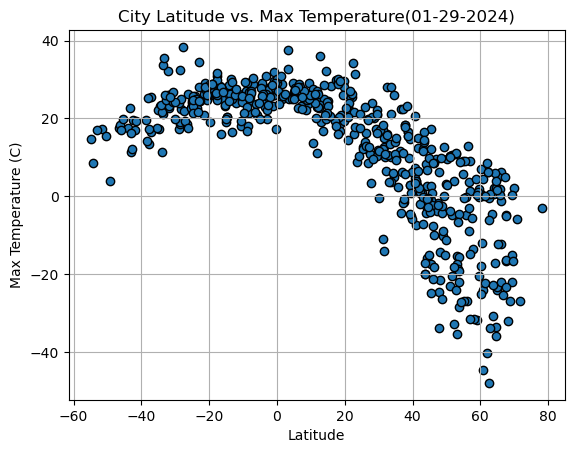

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
#datetime.today() and .strftime functions taken from StackOverflow: https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
from datetime import datetime
date = datetime.today().strftime('%m-%d-%Y')
plt.title(f"City Latitude vs. Max Temperature({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

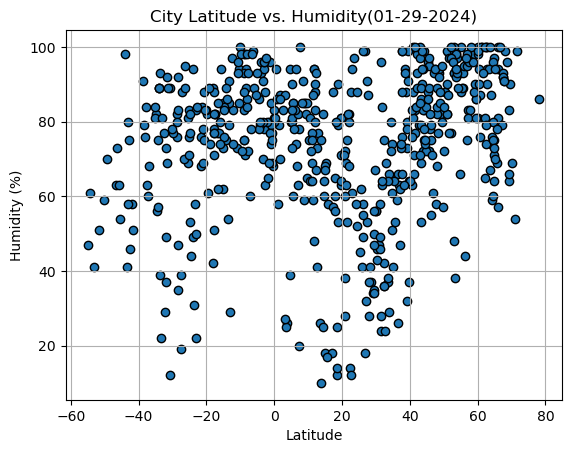

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
#datetime.today() and .strftime functions taken from StackOverflow: https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
from datetime import datetime
date = datetime.today().strftime('%m-%d-%Y')
plt.title(f"City Latitude vs. Humidity({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

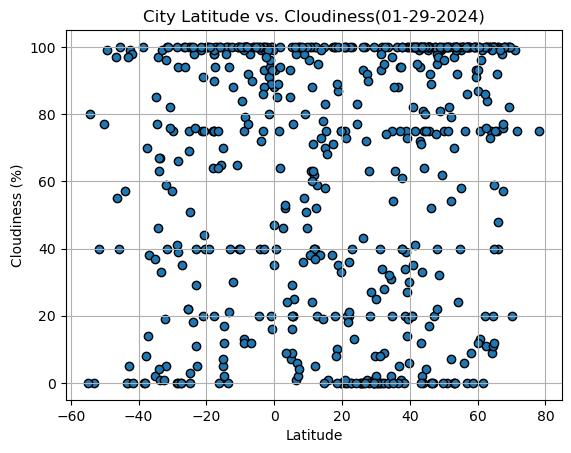

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
#datetime.today() and .strftime functions taken from StackOverflow: https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
from datetime import datetime
date = datetime.today().strftime('%m-%d-%Y')
plt.title(f"City Latitude vs. Cloudiness({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

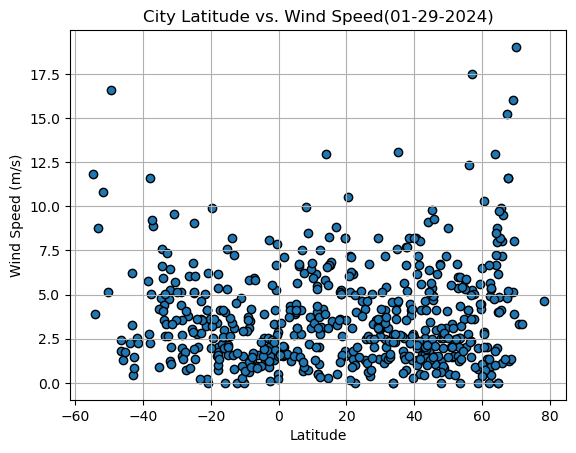

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
#datetime.today() and .strftime functions taken from StackOverflow: https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
from datetime import datetime
date = datetime.today().strftime('%m-%d-%Y')
plt.title(f"City Latitude vs. Wind Speed({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, annotate_x, annotate_y, title, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # xycoords parameter taken from Matplotlib documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html
    plt.annotate(line_eq, (annotate_x, annotate_y), xycoords='axes fraction', fontsize=15, color="red")

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,weno,7.4515,151.8468,27.32,78,100,6.24,FM,1706561933
2,longyearbyen,78.2186,15.6401,-3.09,86,75,4.63,SJ,1706561934
3,bikenibeu village,1.3673,173.1241,28.98,79,75,1.54,KI,1706561934
4,qaqortoq,60.7167,-46.0333,-24.00,76,13,2.86,GL,1706561694
6,bethel,41.3712,-73.4140,2.79,71,100,6.69,US,1706561935


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,11.40,80,0,0.45,AU,1706561933
5,waitangi,-43.9535,-176.5597,17.68,98,57,2.24,NZ,1706561935
7,atafu village,-8.5421,-172.5159,29.23,71,79,3.49,TK,1706561936
9,sao jose da coroa grande,-8.8978,-35.1478,27.25,75,13,3.71,BR,1706561937
10,port-aux-francais,-49.3500,70.2167,3.94,70,99,16.61,TF,1706561937


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.625189802113134


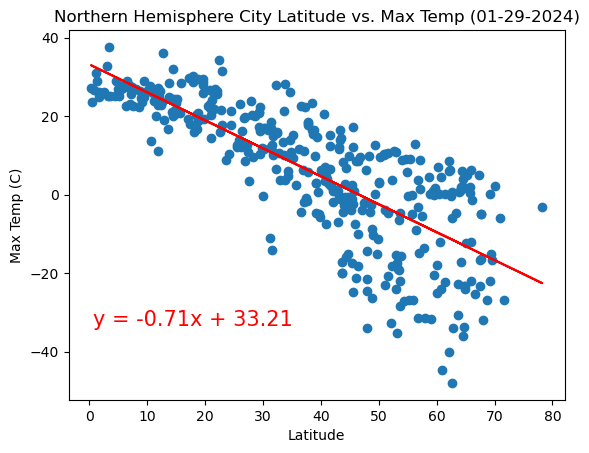

In [48]:
# Linear regression on Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Max Temp ({date})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 0.05, 0.2, title, x_label, y_label)

The r-value is: 0.2524269243089234


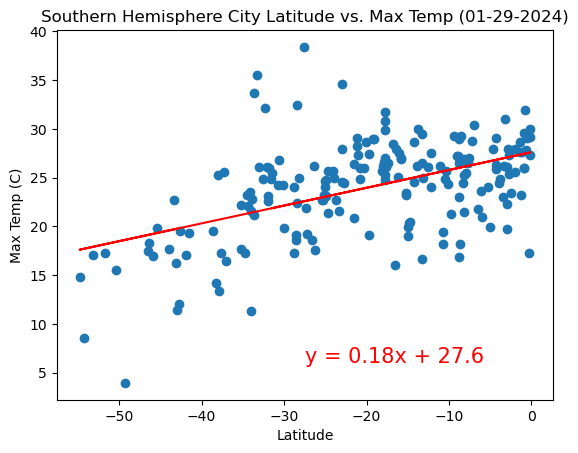

In [56]:
# Linear regression on Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Max Temp ({date})"
x_label = "Latitude"
y_label = "Max Temp (C)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 0.5, 0.1, title, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12994715363547335


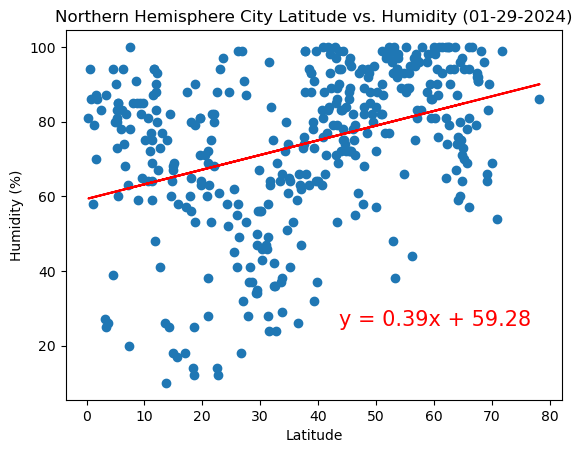

In [57]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Humidity ({date})"
x_label = "Latitude"
y_label = "Humidity (%)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 0.55, 0.2, title, x_label, y_label)

The r-value is: 0.16106770344772695


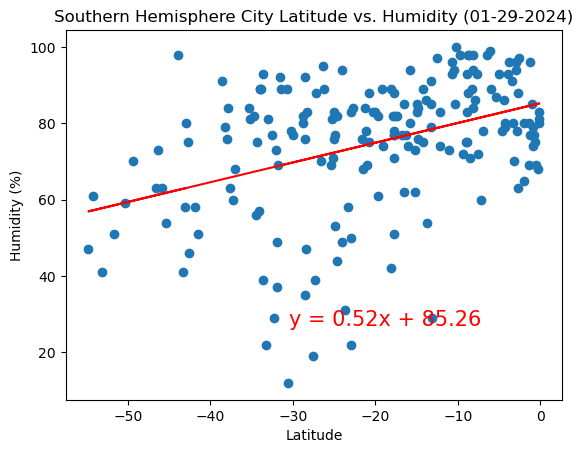

In [58]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Humidity ({date})"
x_label = "Latitude"
y_label = "Humidity (%)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 0.45, 0.2, title, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.056286257695185284


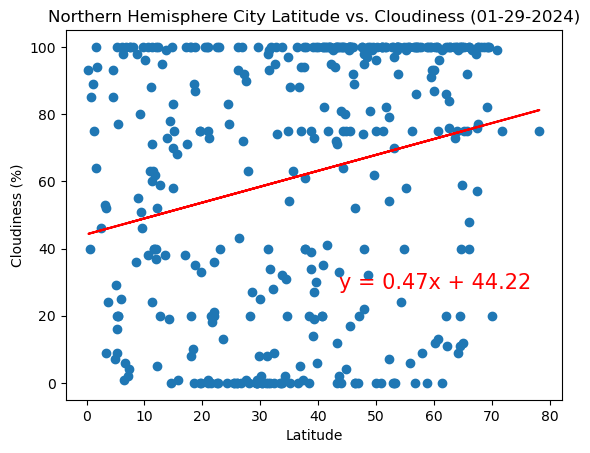

In [59]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Cloudiness ({date})"
x_label = "Latitude"
y_label = "Cloudiness (%)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 0.55, 0.3, title, x_label, y_label)

The r-value is: 0.10121025515256446


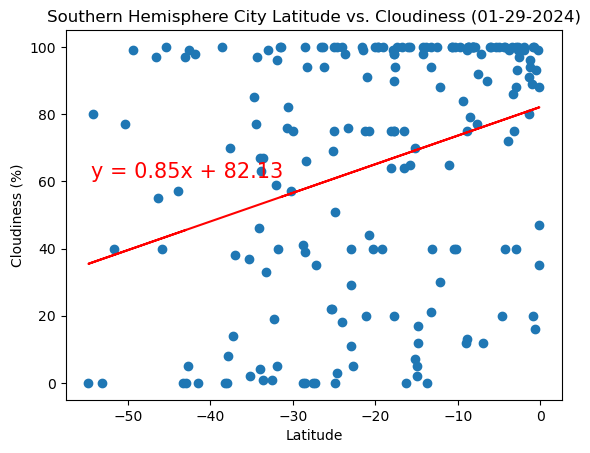

In [61]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Cloudiness ({date})"
x_label = "Latitude"
y_label = "Cloudiness (%)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 0.05, 0.6, title, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01314103120976213


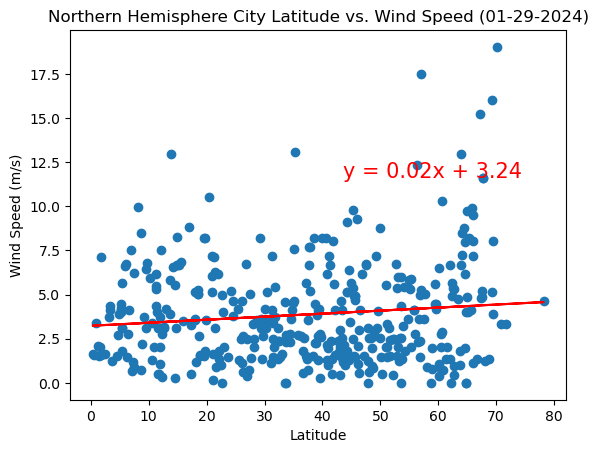

In [62]:
# Northern Hemisphere
title = f"Northern Hemisphere City Latitude vs. Wind Speed ({date})"
x_label = "Latitude"
y_label = "Wind Speed (m/s)"
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 0.55, 0.6, title, x_label, y_label)

The r-value is: 0.12743000180844305


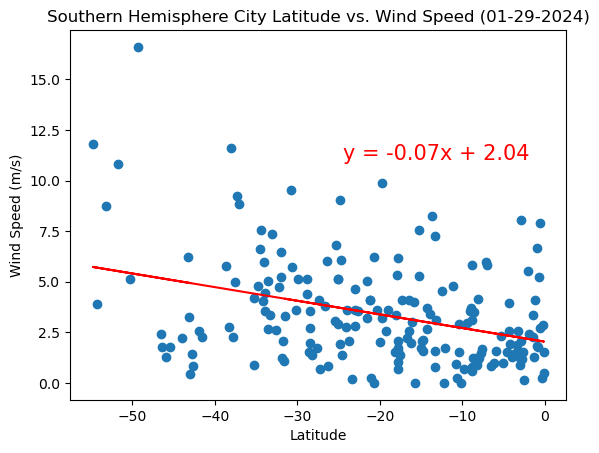

In [63]:
# Southern Hemisphere
title = f"Southern Hemisphere City Latitude vs. Wind Speed ({date})"
x_label = "Latitude"
y_label = "Wind Speed (m/s)"
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 0.55, 0.65, title, x_label, y_label)

**Discussion about the linear relationship:** YOUR RESPONSE HERE